data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


# 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!cp /gdrive/MyDrive/tmp/bitcoin.csv ./

# 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("bitcoin.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [ ]:
print(len(df))

4857377


# 결측치 분포 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
print(df.Timestamp.min(), df.Timestamp.max())
diff = df.Timestamp.max() - df.Timestamp.min()
print(diff)
count_with_60_interval = diff / 60

# timestamp 최소와 최대 값 사이를 60으로 나눈 갯수와 전체 데이터 갯수가 다르다.
# 중간에 timestamp가 빈곳이 있다.
print(count_with_60_interval)
print(len(df))


1325317920 1617148800
291830880
4863848.0
3613769


In [ ]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = df.Timestamp.quantile(q)
    null_count = df[(df.Timestamp>=last_quantile) & (df.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile



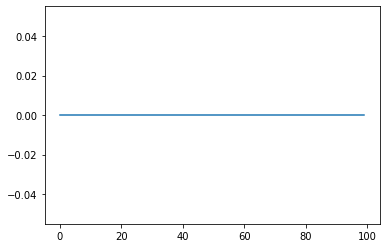

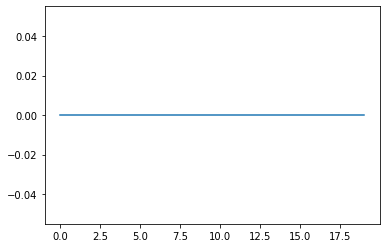

In [ ]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(df)*100.)
plt.show()

plt.plot(null_counts[80:]/len(df)*100.)
plt.show()

전체 데이터 중 80% 이후의 데이터는 최대 0.035%만 null이다. 

이 데이터 만을 가지고 하자. 그리고 결측치는 앞의 값으로 채우자.

# 대상 데이터 추림

In [ ]:
index_of_80_percent = int( len(df) * 0.8 )
df = df[df.index>index_of_80_percent]
print(len(df))

1915093


In [ ]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = df.Timestamp.quantile(q)
    null_count = df[(df.Timestamp>=last_quantile) & (df.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile

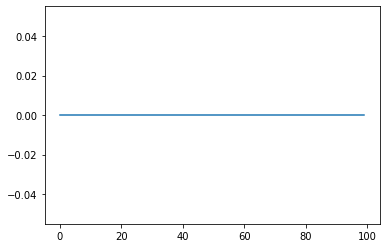

In [ ]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(df)*100.)
plt.show()

1개 구간이 1만 개 이다. 최대가 0.07이면 만개 중에 7개.
연속되어 있더라도 무시해도 되겠다.

0


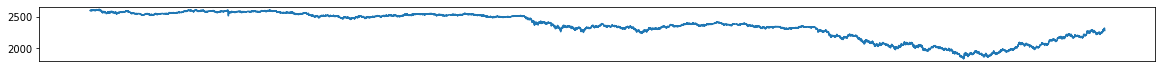

1


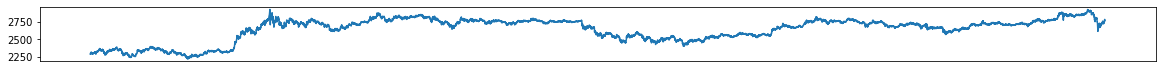

2


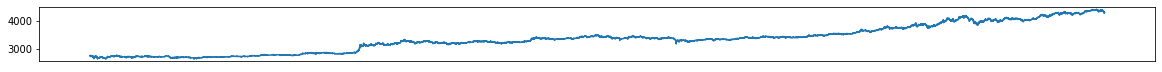

3


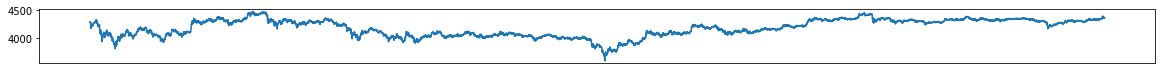

4


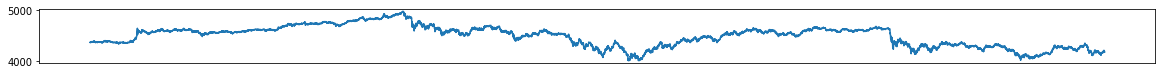

5


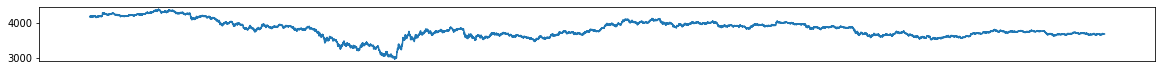

6


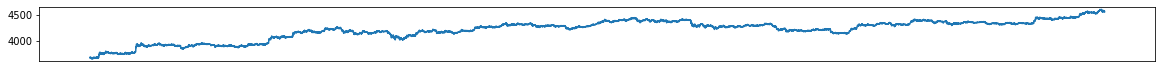

7


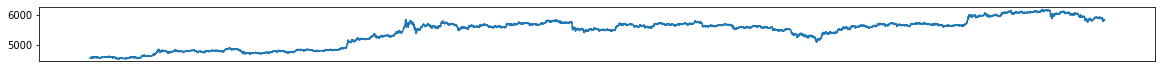

8


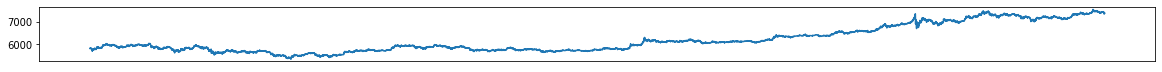

9


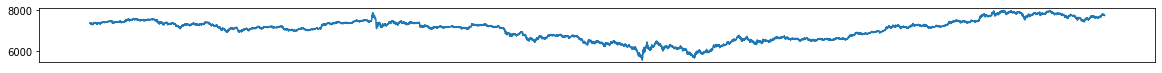

10


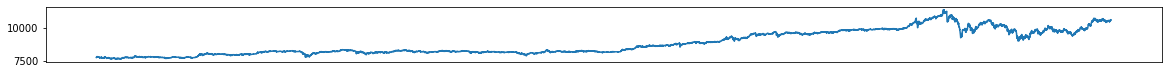

11


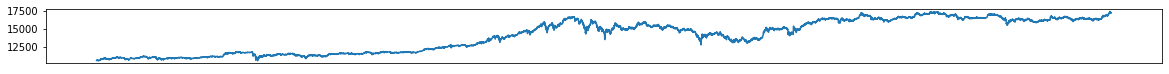

12


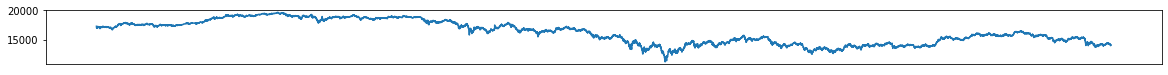

13


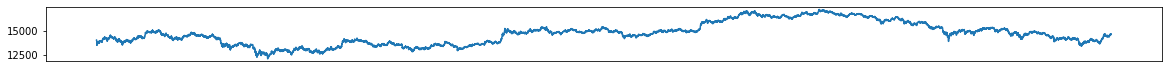

14


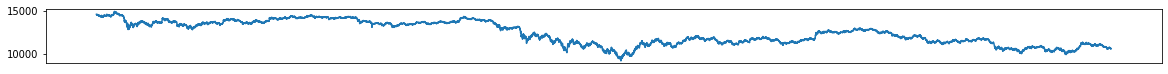

15


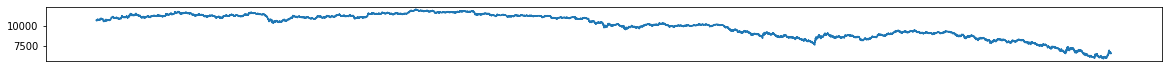

16


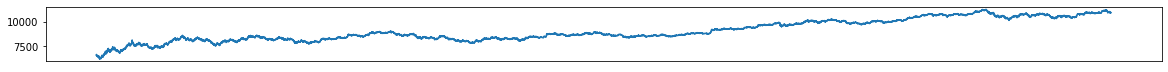

17


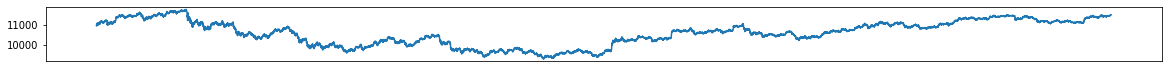

18


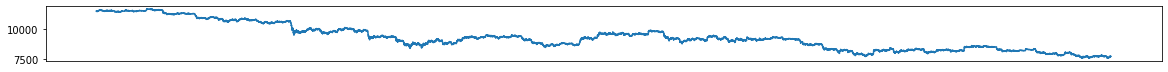

19


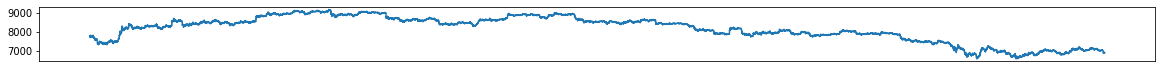

20


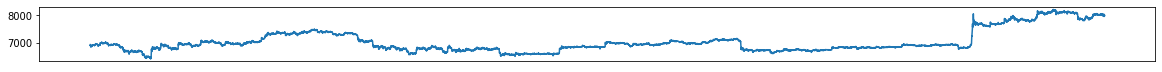

21


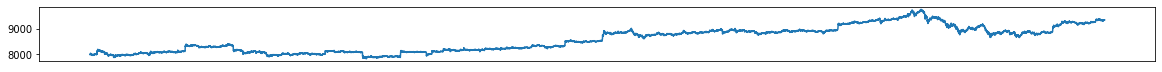

22


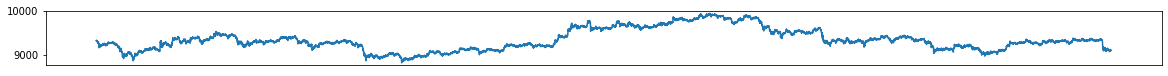

23


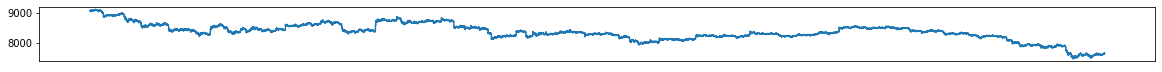

24


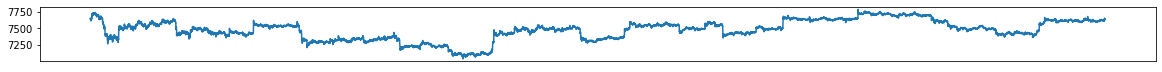

25


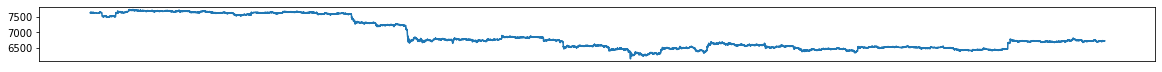

26


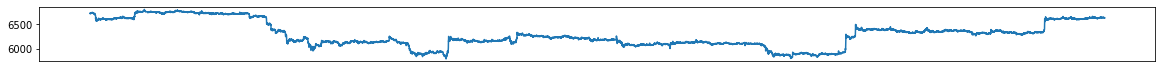

27


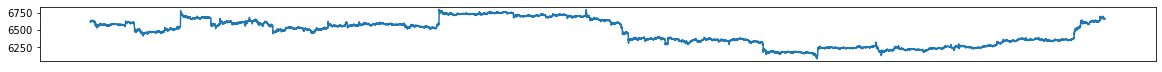

28


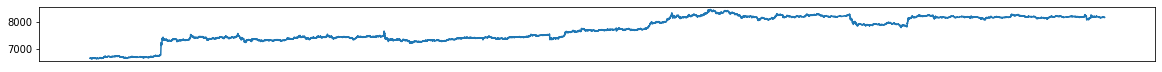

29


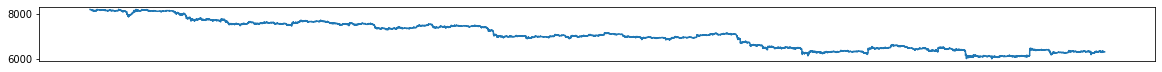

30


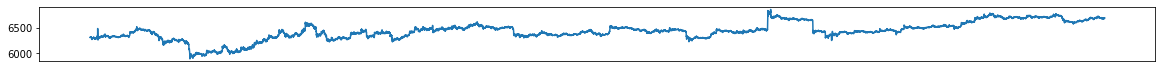

31


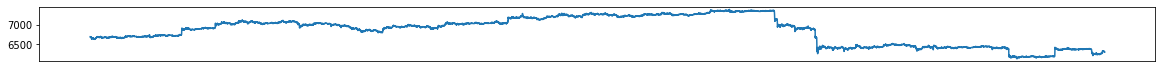

32


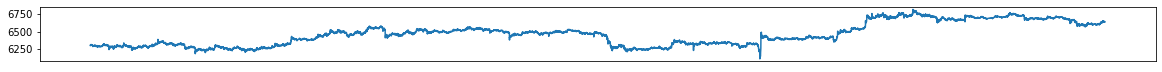

33


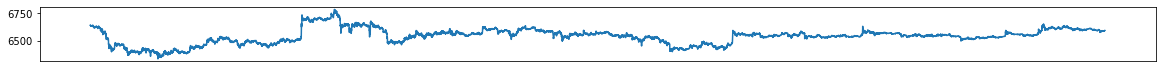

34


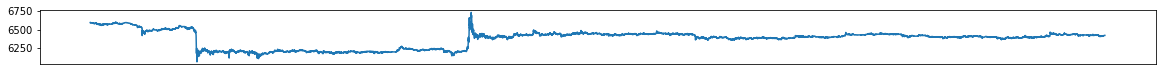

35


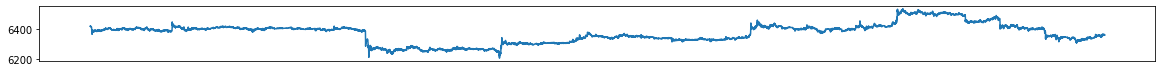

36


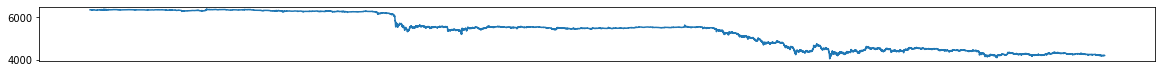

37


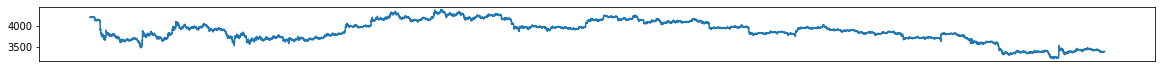

38


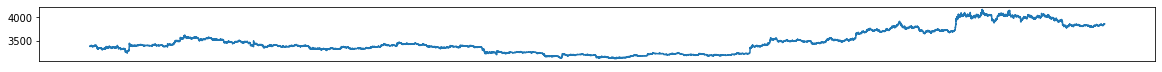

39


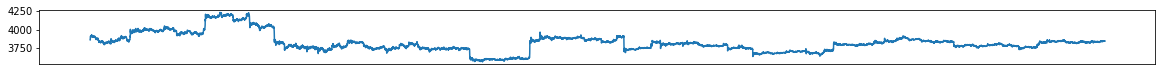

40


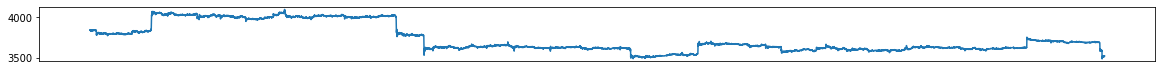

41


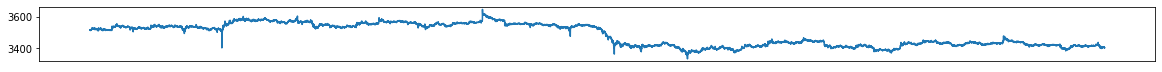

42


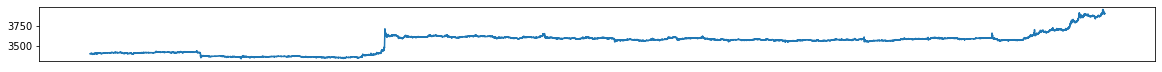

43


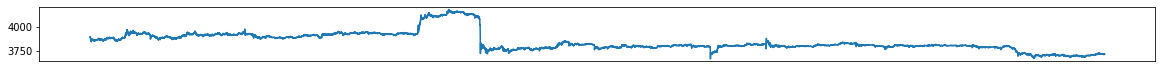

44


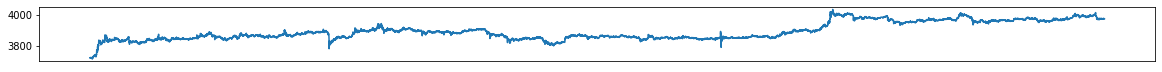

45


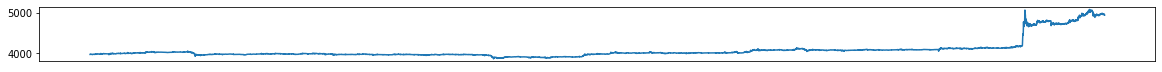

46


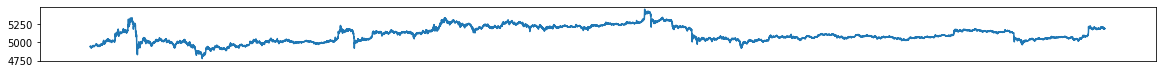

47


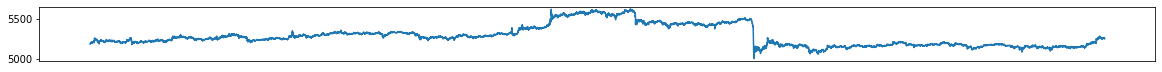

48


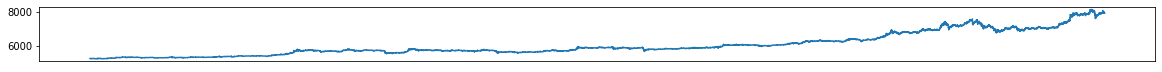

49


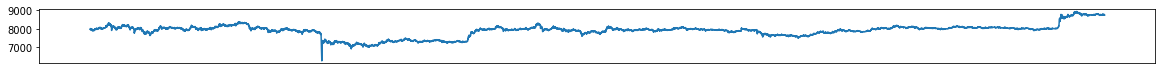

50


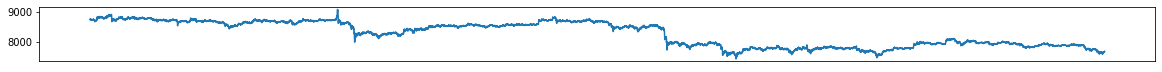

51


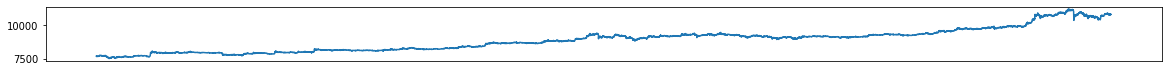

52


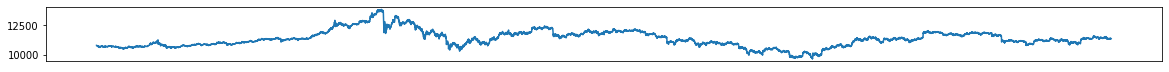

53


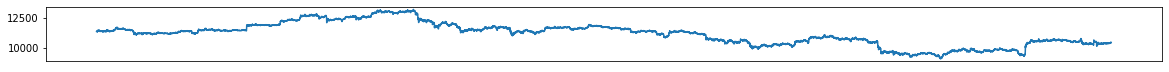

54


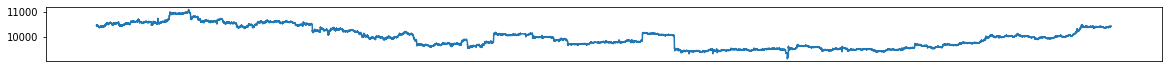

55


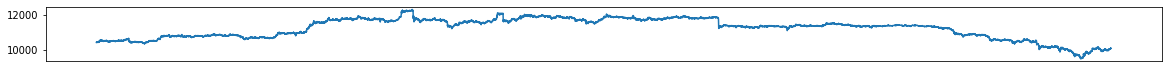

56


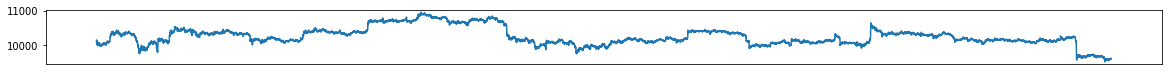

57


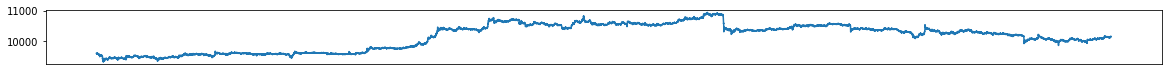

58


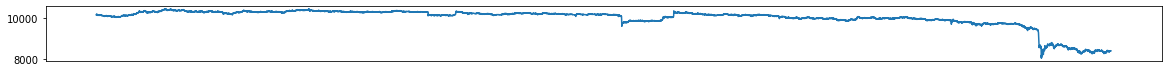

59


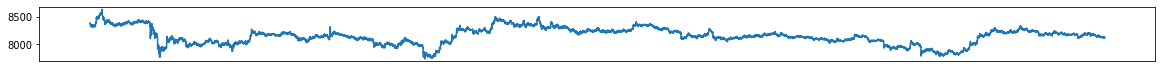

60


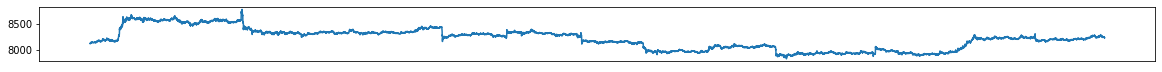

61


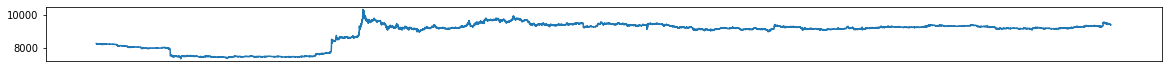

62


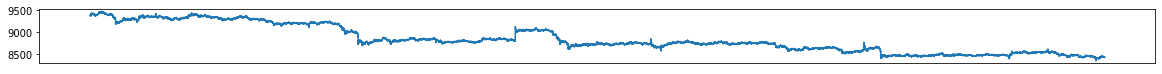

63


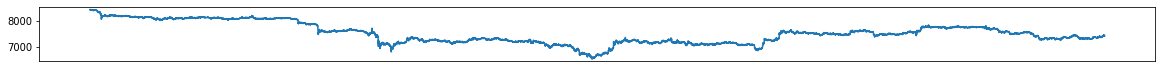

64


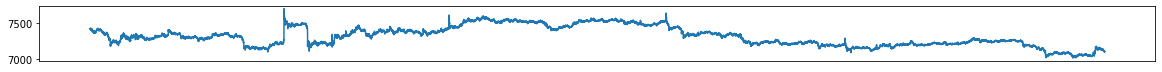

65


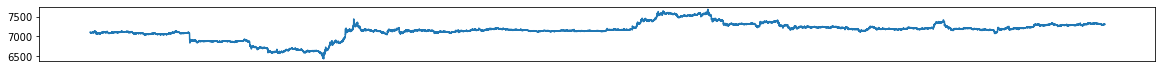

66


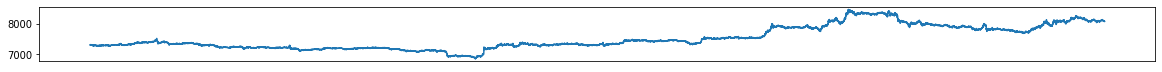

67


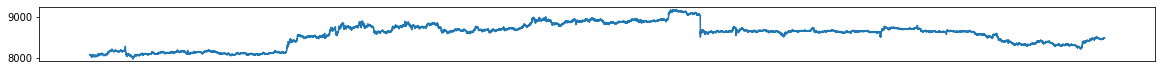

68


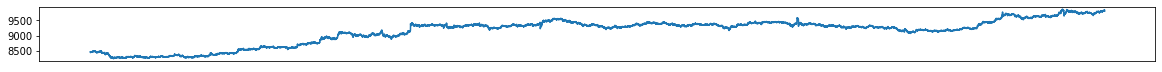

69


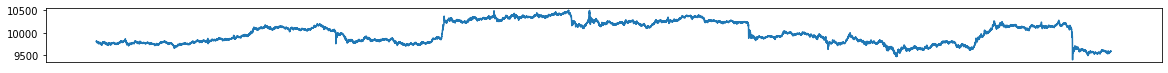

70


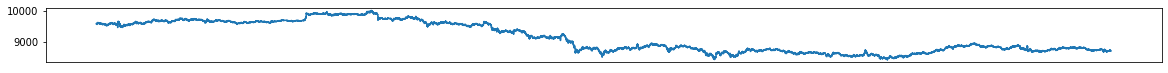

71


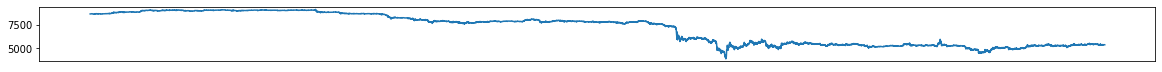

72


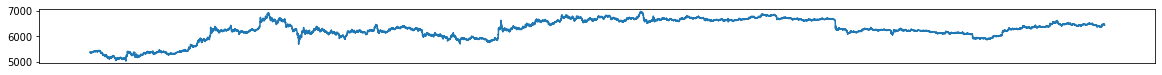

73


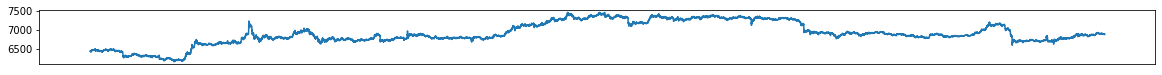

74


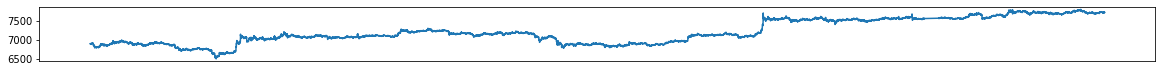

75


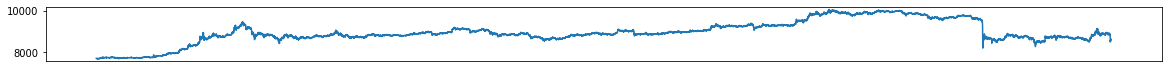

76


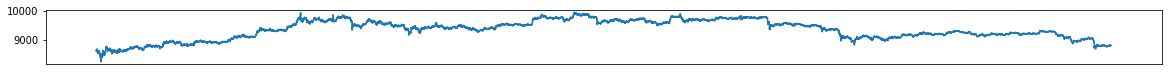

77


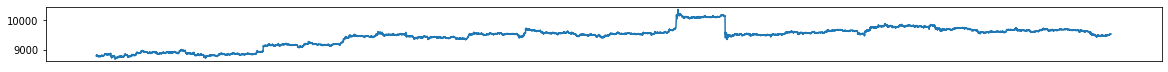

78


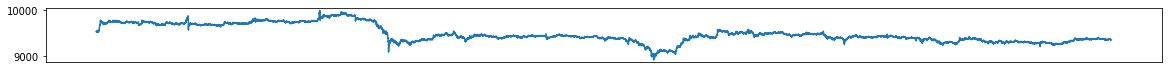

79


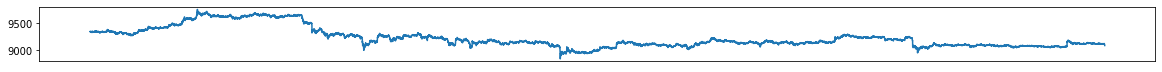

80


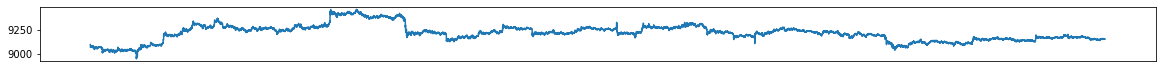

81


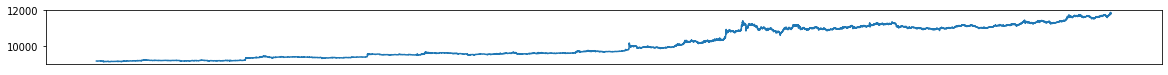

82


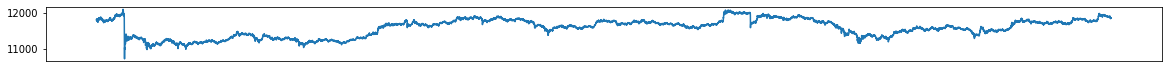

83


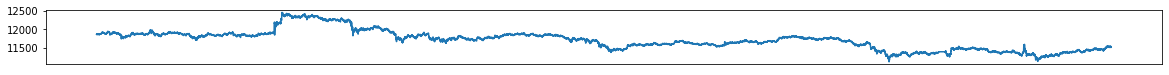

84


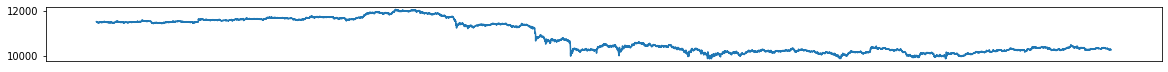

85


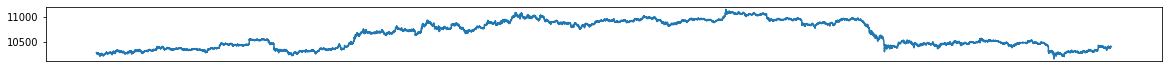

86


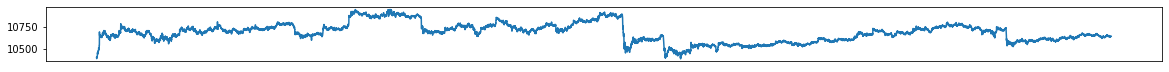

87


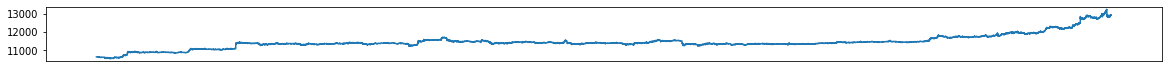

88


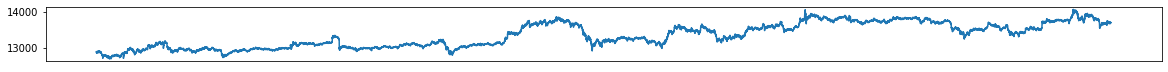

89


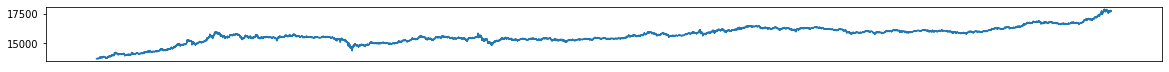

90


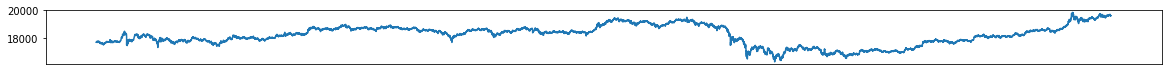

91


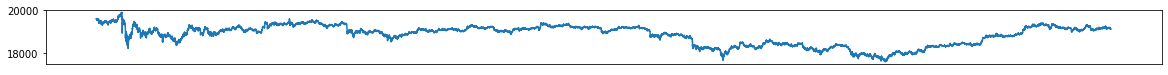

92


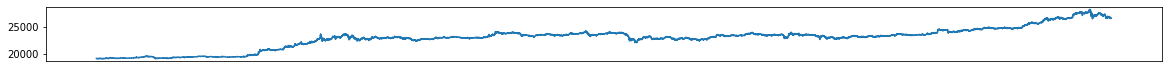

93


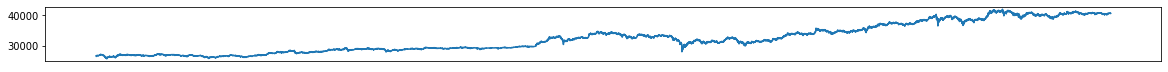

94


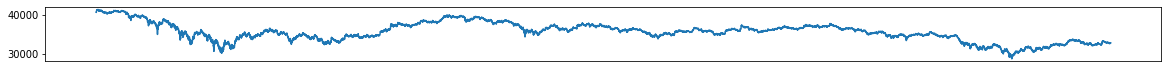

95


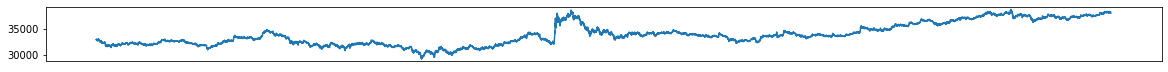

96


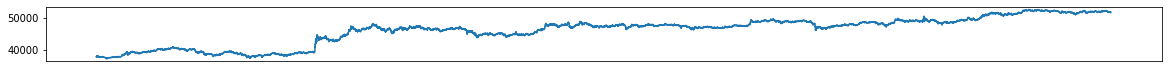

97


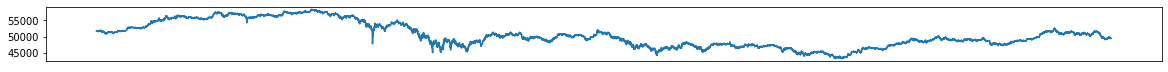

98


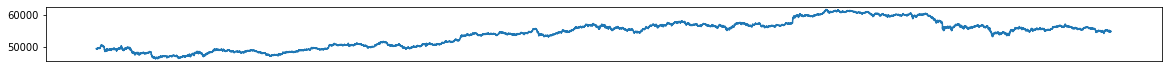

99


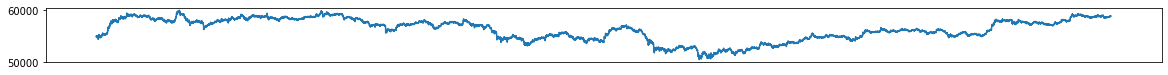

In [ ]:
interval = int(len(df)/100)
for i in range(100):
    print(i)
    plt.figure(figsize=(20,1))
    plt.plot(df.Open[i*interval:(i+1)*interval])
    plt.xticks([])
    plt.show()

# 결측치 처리

In [ ]:
print(df.isnull().sum())

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
df.fillna(method="ffill", inplace=True)

In [ ]:
print(df.isnull().sum().sum())

0


# 불필요 컬럼 삭제

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2891016,1499167200,2608.00,2609.99,2608.00,2609.99,15.880890,41444.385720,2609.701706
2891017,1499167260,2609.99,2610.00,2608.00,2610.00,18.718414,48845.352604,2609.481335
2891018,1499167320,2610.00,2610.00,2608.00,2608.01,3.637678,9492.840990,2609.587721
2891019,1499167380,2608.01,2613.49,2608.01,2613.49,6.122601,15977.356319,2609.570112
2891020,1499167440,2609.01,2613.49,2609.01,2613.00,5.090360,13298.879966,2612.561828


In [ ]:
df.drop(columns=["Timestamp"], inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2891016,2608.00,2609.99,2608.00,2609.99,15.880890,41444.385720,2609.701706
2891017,2609.99,2610.00,2608.00,2610.00,18.718414,48845.352604,2609.481335
2891018,2610.00,2610.00,2608.00,2608.01,3.637678,9492.840990,2609.587721
2891019,2608.01,2613.49,2608.01,2613.49,6.122601,15977.356319,2609.570112
2891020,2609.01,2613.49,2609.01,2613.00,5.090360,13298.879966,2612.561828


# 각 컬럼 분포 보기

Open


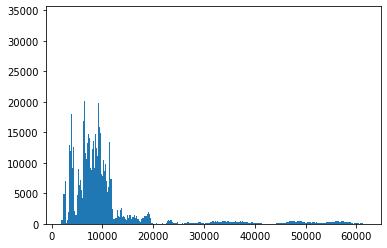

High


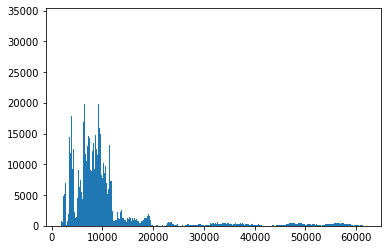

Low


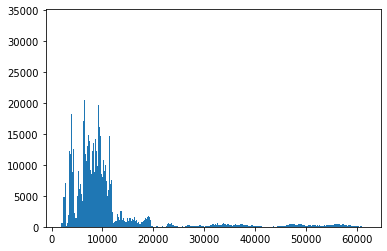

Close


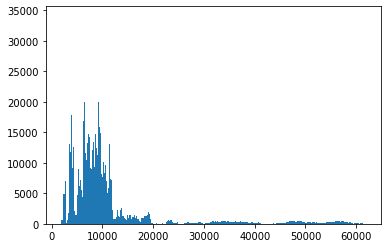

Volume_(BTC)


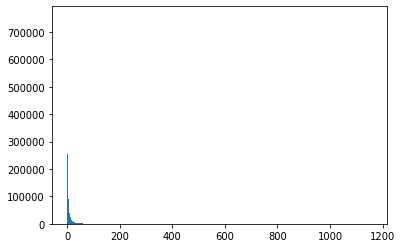

Volume_(Currency)


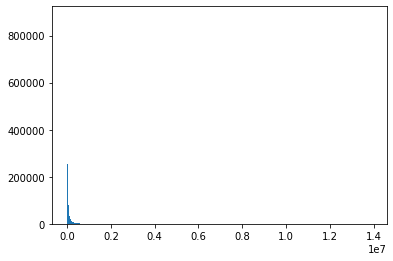

Weighted_Price


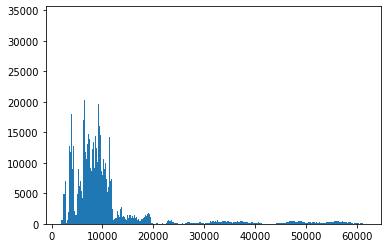

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

# 모든 컬럼 로그 처리

In [ ]:
df = np.log(df+1)

Open


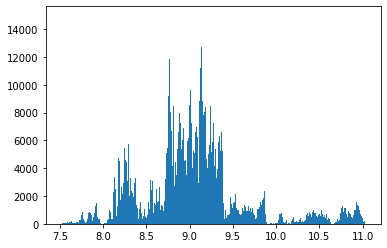

High


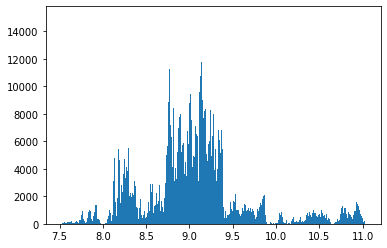

Low


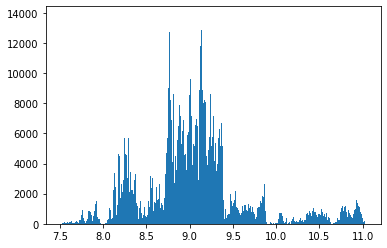

Close


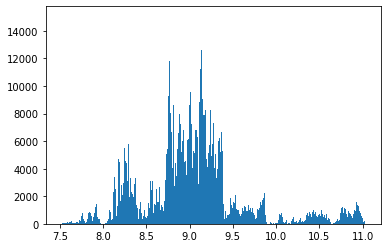

Volume_(BTC)


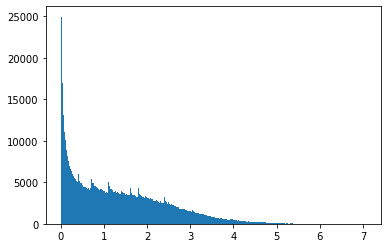

Volume_(Currency)


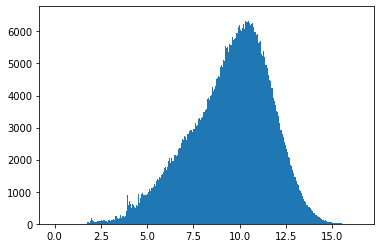

Weighted_Price


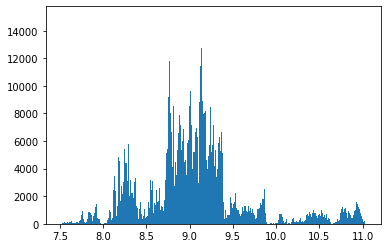

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

# numpy 변환

In [ ]:
raw_data = df.to_numpy()
print(raw_data.shape)

(1915093, 7)


In [ ]:
print(raw_data[:5])

[[ 7.86672229  7.86748474  7.86672229  7.86748474  2.82618221 10.63213183
   7.86737432]
 [ 7.86748474  7.86748857  7.86672229  7.86748857  2.98155293 10.79643499
   7.8672899 ]
 [ 7.86748857  7.86748857  7.86672229  7.86672612  1.5342139   9.15839855
   7.86733066]
 [ 7.86672612  7.86882433  7.86672612  7.86882433  1.96327295  9.67899036
   7.86732391]
 [ 7.86710933  7.86882433  7.86710933  7.86863689  1.80670718  9.49551029
   7.86846926]]


# normalize

In [ ]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[11.03108502 11.03138077 11.02962665 11.03138029  7.05481083 16.44744784
 11.03031803]
[7.51261754 7.51533912 7.51261754 7.51261754 0.         0.
 7.51311635]


In [ ]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.10064175 0.10015399 0.10068349 0.10084999 0.40060354 0.64643049
  0.10072154]
 [0.10085846 0.10015508 0.10068349 0.10085108 0.42262691 0.65642008
  0.10069754]
 [0.10085954 0.10015508 0.10068349 0.1006344  0.21747059 0.55682794
  0.10070913]
 [0.10064284 0.10053499 0.10068458 0.10123069 0.27828853 0.58847977
  0.10070721]
 [0.10075176 0.10053499 0.10079354 0.10117742 0.25609577 0.57732424
  0.10103285]]


In [ ]:
preprocessed = normalized

# 파라매터 설정

In [ ]:
SEQUENCE_LENGTH = 14 * 60
OFFSET = 14 * 60
BATCH_SIZE = 32
SAMPLING_COUNT = 10000

# by Data Sampling

## 샘플링

In [ ]:
numbers = preprocessed

In [ ]:
raw_x = []
raw_y = []

for j in range(SAMPLING_COUNT):
  i = np.random.randint(len(numbers)-SEQUENCE_LENGTH-OFFSET)
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [ ]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[0.35780707 0.35727989 0.35780239 ... 0.12734839 0.55611509 0.3577013 ]
 [0.35771626 0.35718901 0.35781077 ... 0.08966064 0.52567249 0.35765993]
 [0.35769818 0.35729444 0.35784607 ... 0.0927845  0.52851287 0.3577408 ]
 ...
 [0.35431644 0.35378684 0.35439862 ... 0.23211736 0.61895486 0.35423764]
 [0.35425173 0.35378684 0.35417528 ... 0.24918215 0.62790983 0.35420647]
 [0.3541178  0.35358852 0.3540859  ... 0.47301186 0.73317589 0.35399964]]
[0.35500634 0.35447722 0.35515355 0.35497655 0.00544496 0.33594544
 0.35499228]

[[0.51389432 0.51368384 0.51405317 ... 0.27713975 0.6763112  0.51404471]
 [0.51395361 0.51372964 0.51416673 ... 0.06834963 0.53763887 0.51411871]
 [0.51414896 0.51390415 0.51399867 ... 0.31974533 0.69715268 0.51413185]
 ...
 [0.51366058 0.51332248 0.51366914 ... 0.34800449 0.71044769 0.51366843]
 [0.5136425  0.51355427 0.51385548 ... 0.10196107 0.56984391 0.51395851]
 [0.51380242 0.51351455 0.51382159 ... 0.23827256 0.65633748 0.5137875 ]]
[0.50830389 0.50788054 0.508514

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(10000, 840, 7)
(10000, 7)
Training Data:
(9000, 840, 7)
(9000, 7)
Test Data:
(1000, 840, 7)
(1000, 7)


train_x[0]
 [[0.08926981 0.08855735 0.08930682 ... 0.00294587 0.24209864 0.08916012]
 [0.08926981 0.08855735 0.08930682 ... 0.02482169 0.37543213 0.08916012]
 [0.08926981 0.08855735 0.08930682 ... 0.0050769  0.27516815 0.08916012]
 ...
 [0.0787082  0.07798846 0.07812919 ... 0.35911851 0.62247543 0.07807038]
 [0.07810388 0.07738372 0.07813627 ... 0.02691655 0.37842558 0.07799017]
 [0.07809799 0.07740378 0.07813037 ... 0.35868545 0.62225776 0.07799614]]

train_y[0]
 [0.07286837 0.0726118  0.07251619 0.07331471 0.45819641 0.6663891
 0.0726313 ]


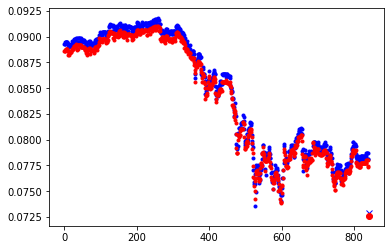

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

## 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
Total params: 70,999
Trainable params: 70,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
254/254 [==============================] - 17s 49ms/step - loss: 0.0643 - mape: 138.0620 - val_loss: 0.0155 - val_mape: 213.8344
Epoch 2/10
254/254 [========================

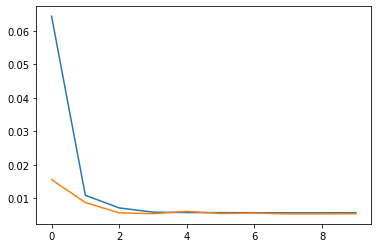

32/32 [==============================] - 1s 20ms/step - loss: 0.0056 - mape: 165.6557
loss= 0.005564290564507246
mape= 165.6556854248047


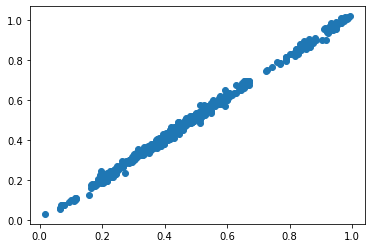

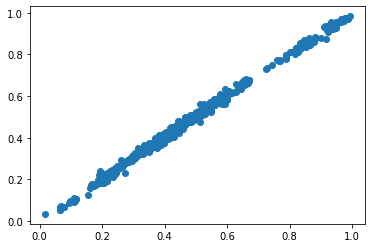

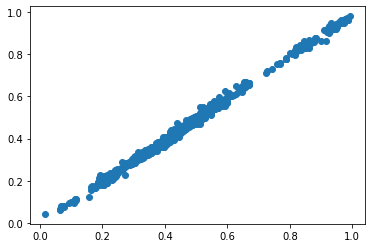

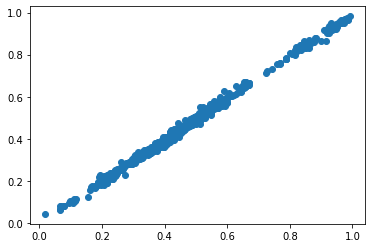

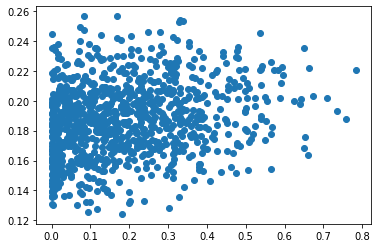

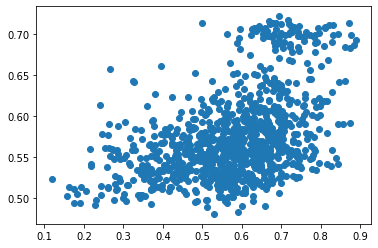

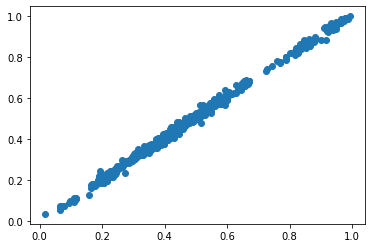

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## 결과 보기

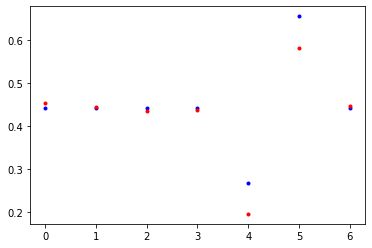

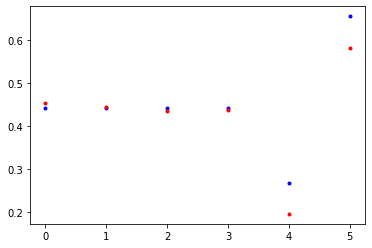

In [ ]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [ ]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins
delogged_test_y = np.exp(denomalized_test_y) - 1
delogged_y = np.exp(denomalized_y_) - 1


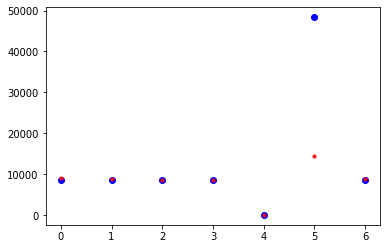

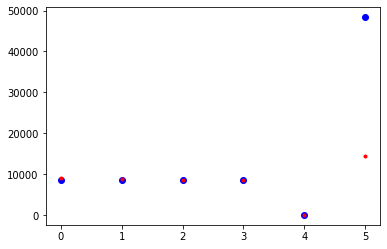

In [ ]:
plt.plot(delogged_test_y[0], 'bo')
plt.plot(delogged_y[0], 'r.')
plt.show()

plt.plot(delogged_test_y[0,:-1], 'bo')
plt.plot(delogged_y[0,:-1], 'r.')
plt.show()